# **Experiment No : 09**

In [12]:
# importing required libraries
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

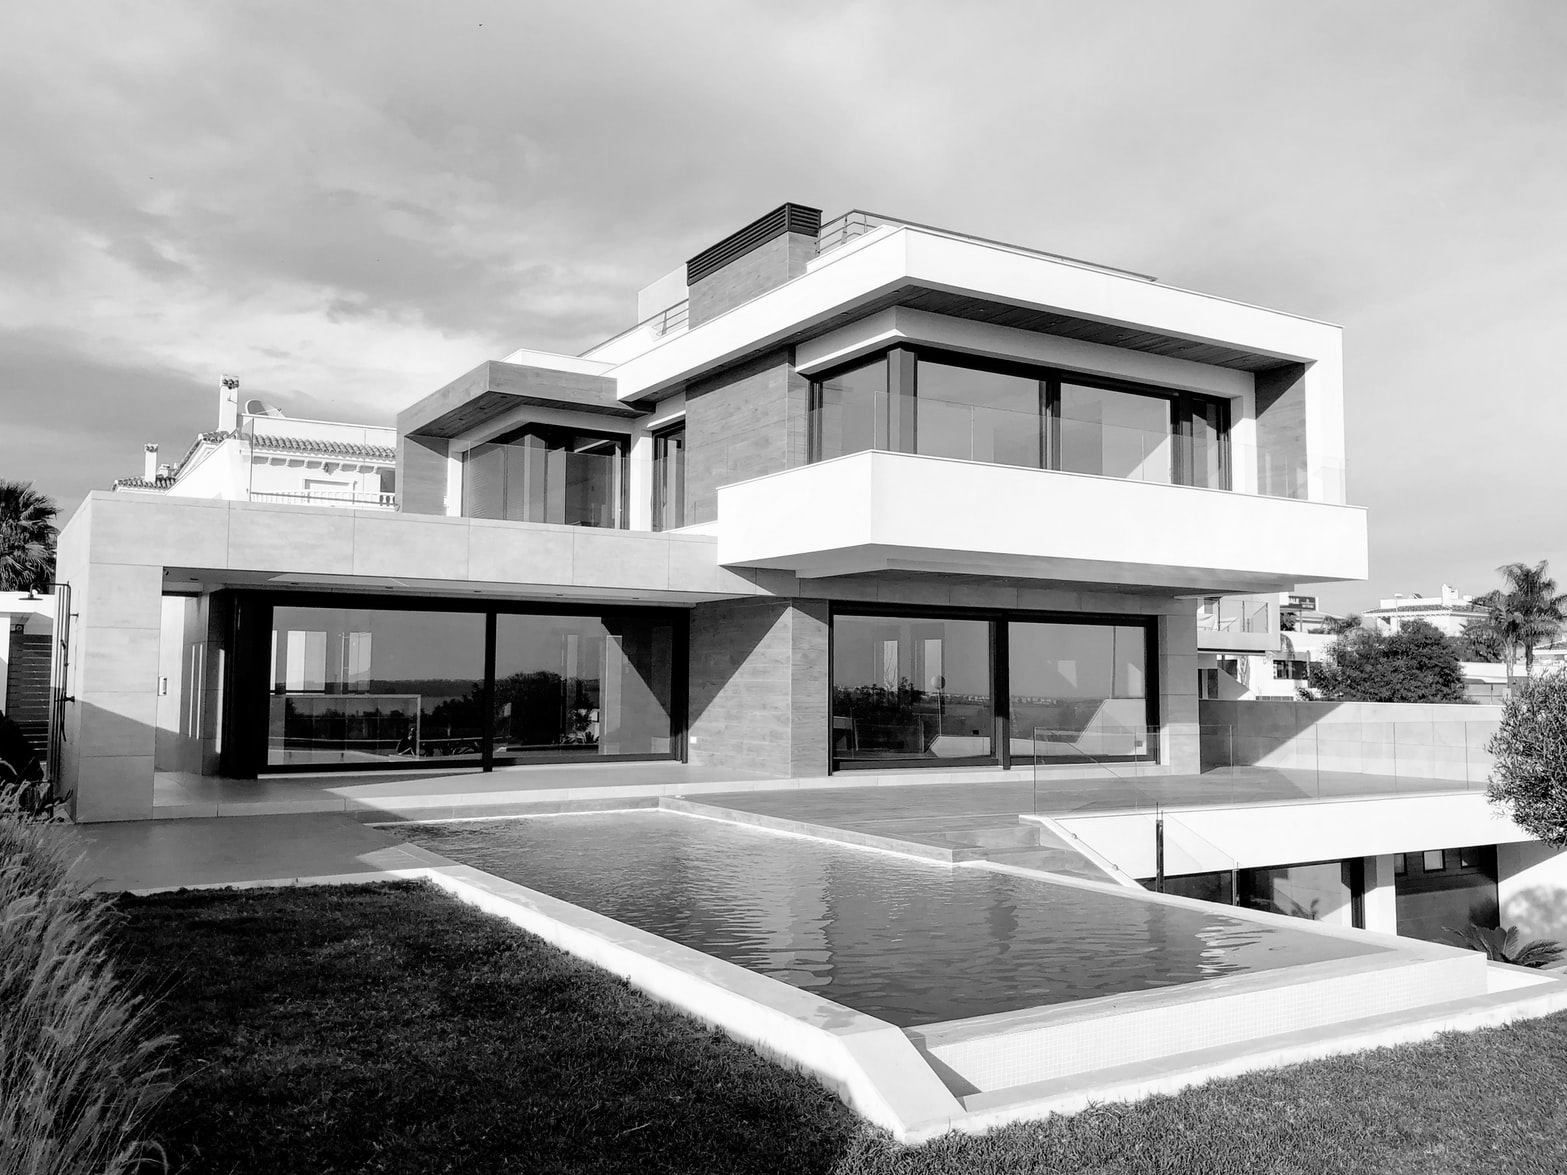

In [13]:
url = "https://images.unsplash.com/photo-1580587771525-78b9dba3b914?ixlib=rb-1.2.1&auto=format&fit=crop&w=1567&q=80"
image = io.imread(url)
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)
m,n = gray_image.shape
img=gray_image
ct= np.empty(shape=(m,n),dtype='uint8')

#Contrast Stretching

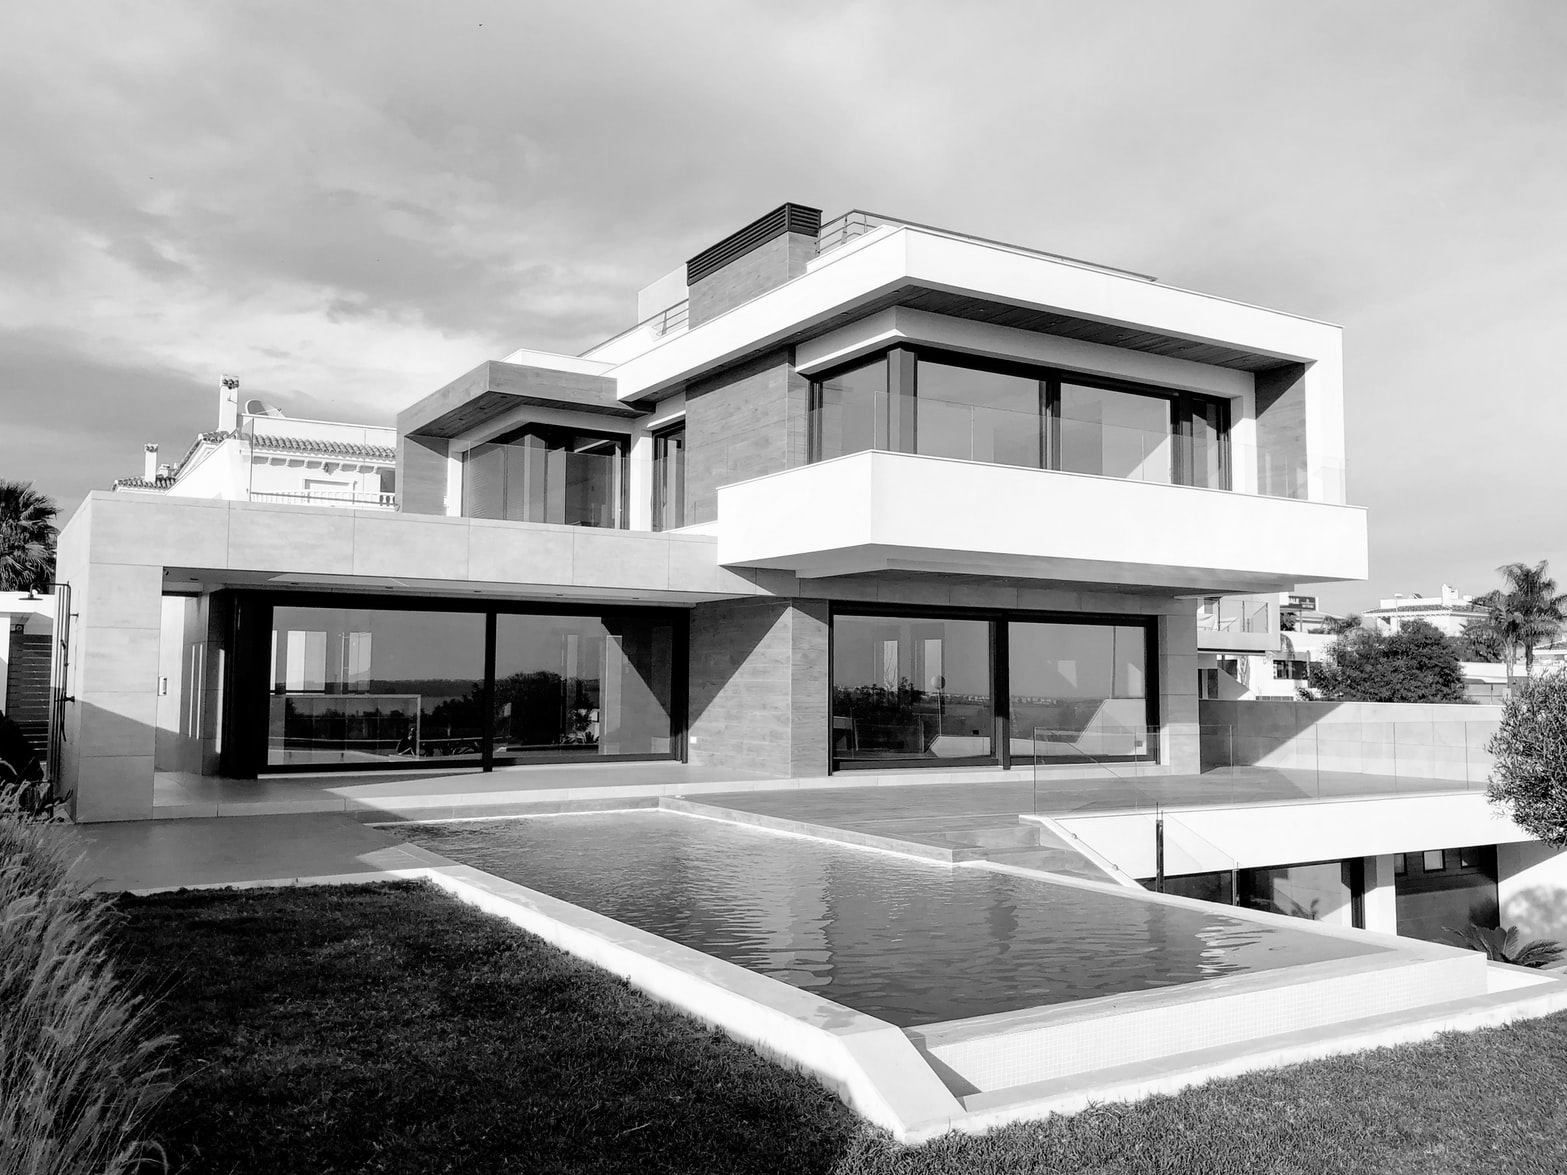

In [14]:
cv2_imshow(img)

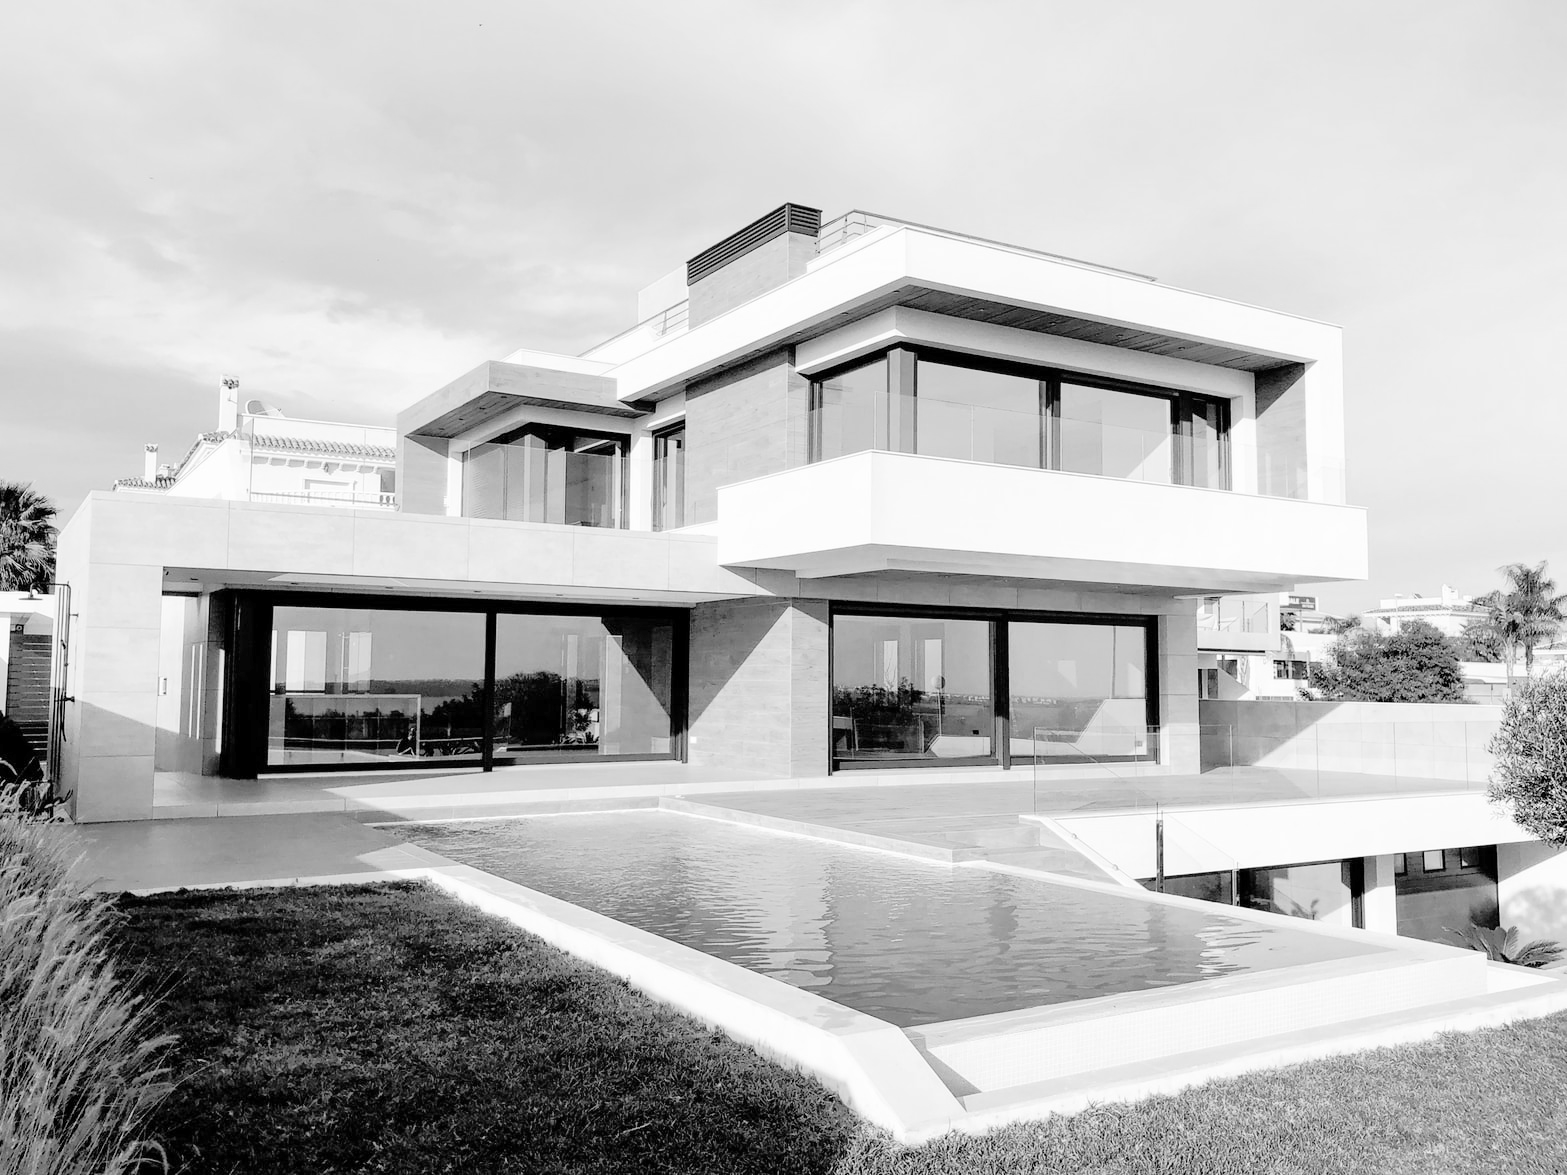

In [15]:
# Here (r1,s1) = (50,100) and (r2,s2) = (150,200)
r1 = 50
s1 = 100
r2 = 150
s2 = 200

for i in range(len(img)):
    for j in range(len(img[i])):
        x = img[i][j]
        if(0 <= x and x <= r1):
            ct[i][j] = (s1/r1 * x)
        elif(r1 < x and x <= r2):
            ct[i][j] = ((s2 - s1)/(r2 - r1)) * (x - r1) + s1
        elif(r2 < x and x <= 255):
            ct[i][j] =((255 - s2)/(255 - r2)) * (x - r2) + s2
cv2_imshow(ct)

# **Programming Ex 01**

1. Do thresholding of a random image at T=150 using contrast
stretching program.


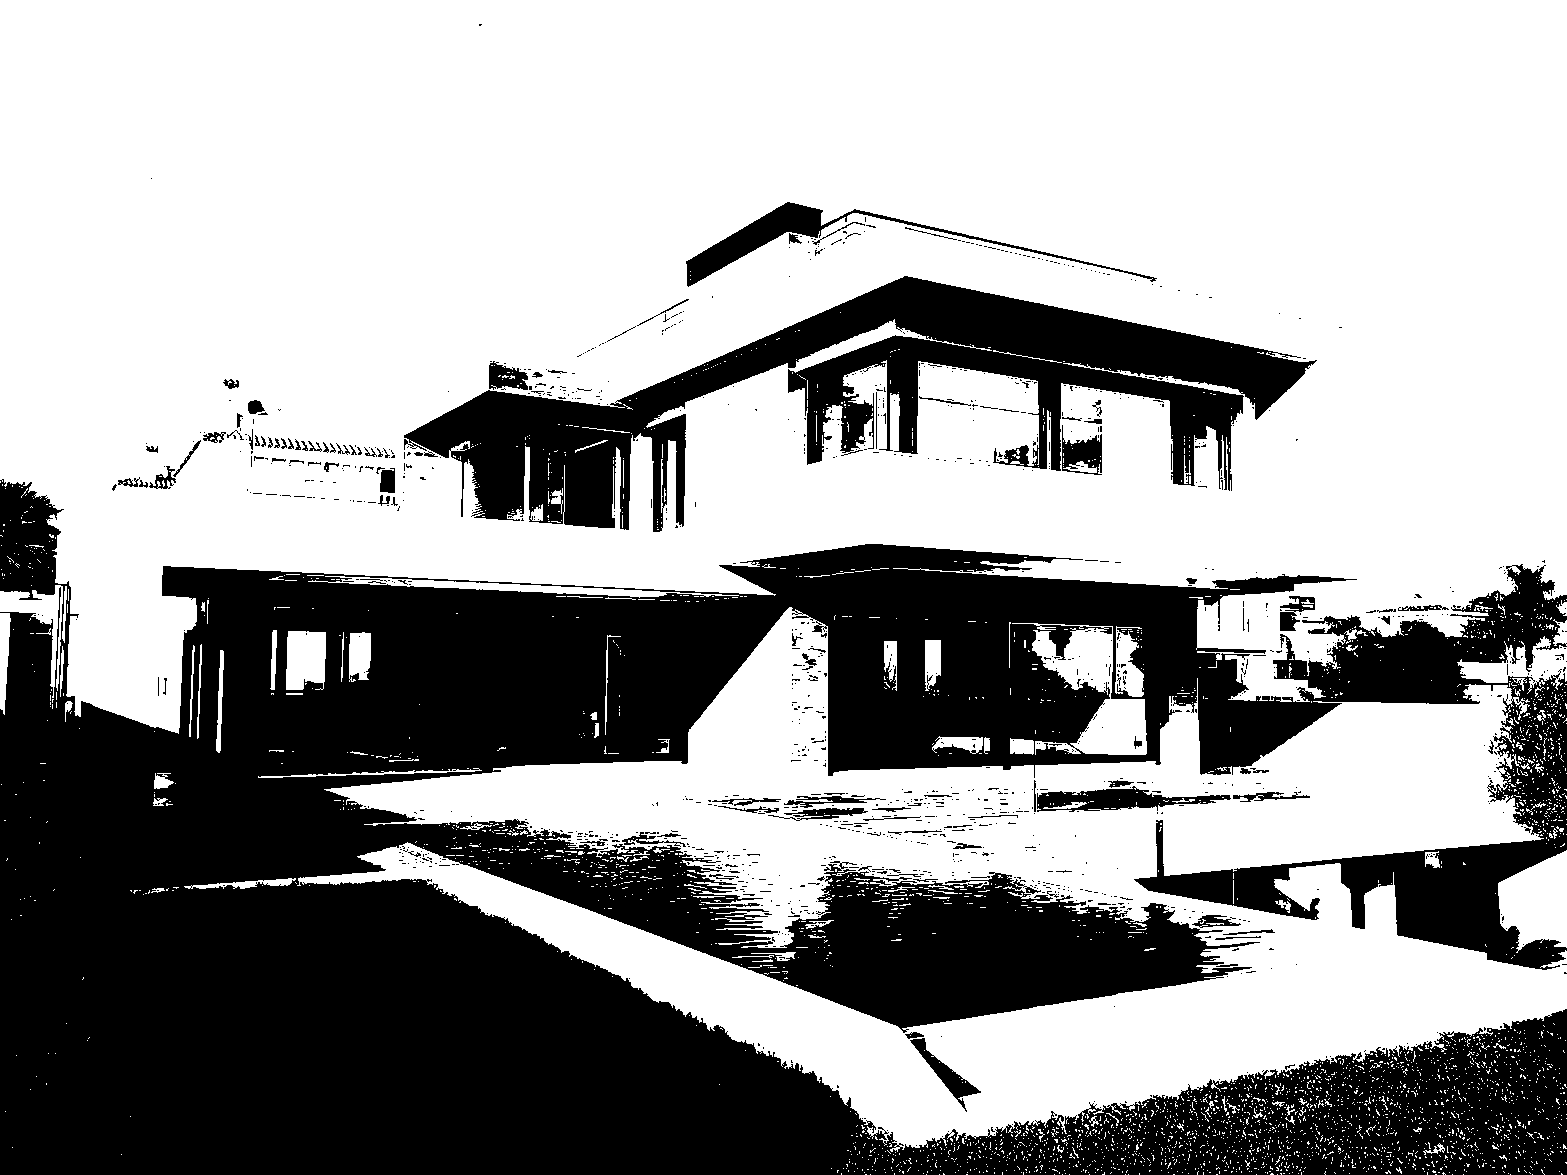

In [16]:
# T = 150
r1,r2 = 150,150
s1 = 0
s2 = 255

for i in range(len(img)):
    for j in range(len(img[i])):
        x = img[i][j]
        if(0 <= x and x <= r1):
            ct[i][j] = (s1/r1 * x)
        elif(r1 < x and x <= r2):
            ct[i][j] = ((s2 - s1)/(r2 - r1)) * (x - r1) + s1
        elif(r2 < x and x <= 255):
            ct[i][j] =((255 - s2)/(255 - r2)) * (x - r2) + s2
cv2_imshow(ct)

# **Programming Ex 02**

2. Do contrast stretching of a random image with (r1,s1)=(65,90) and (r2,s2)=(165,190)


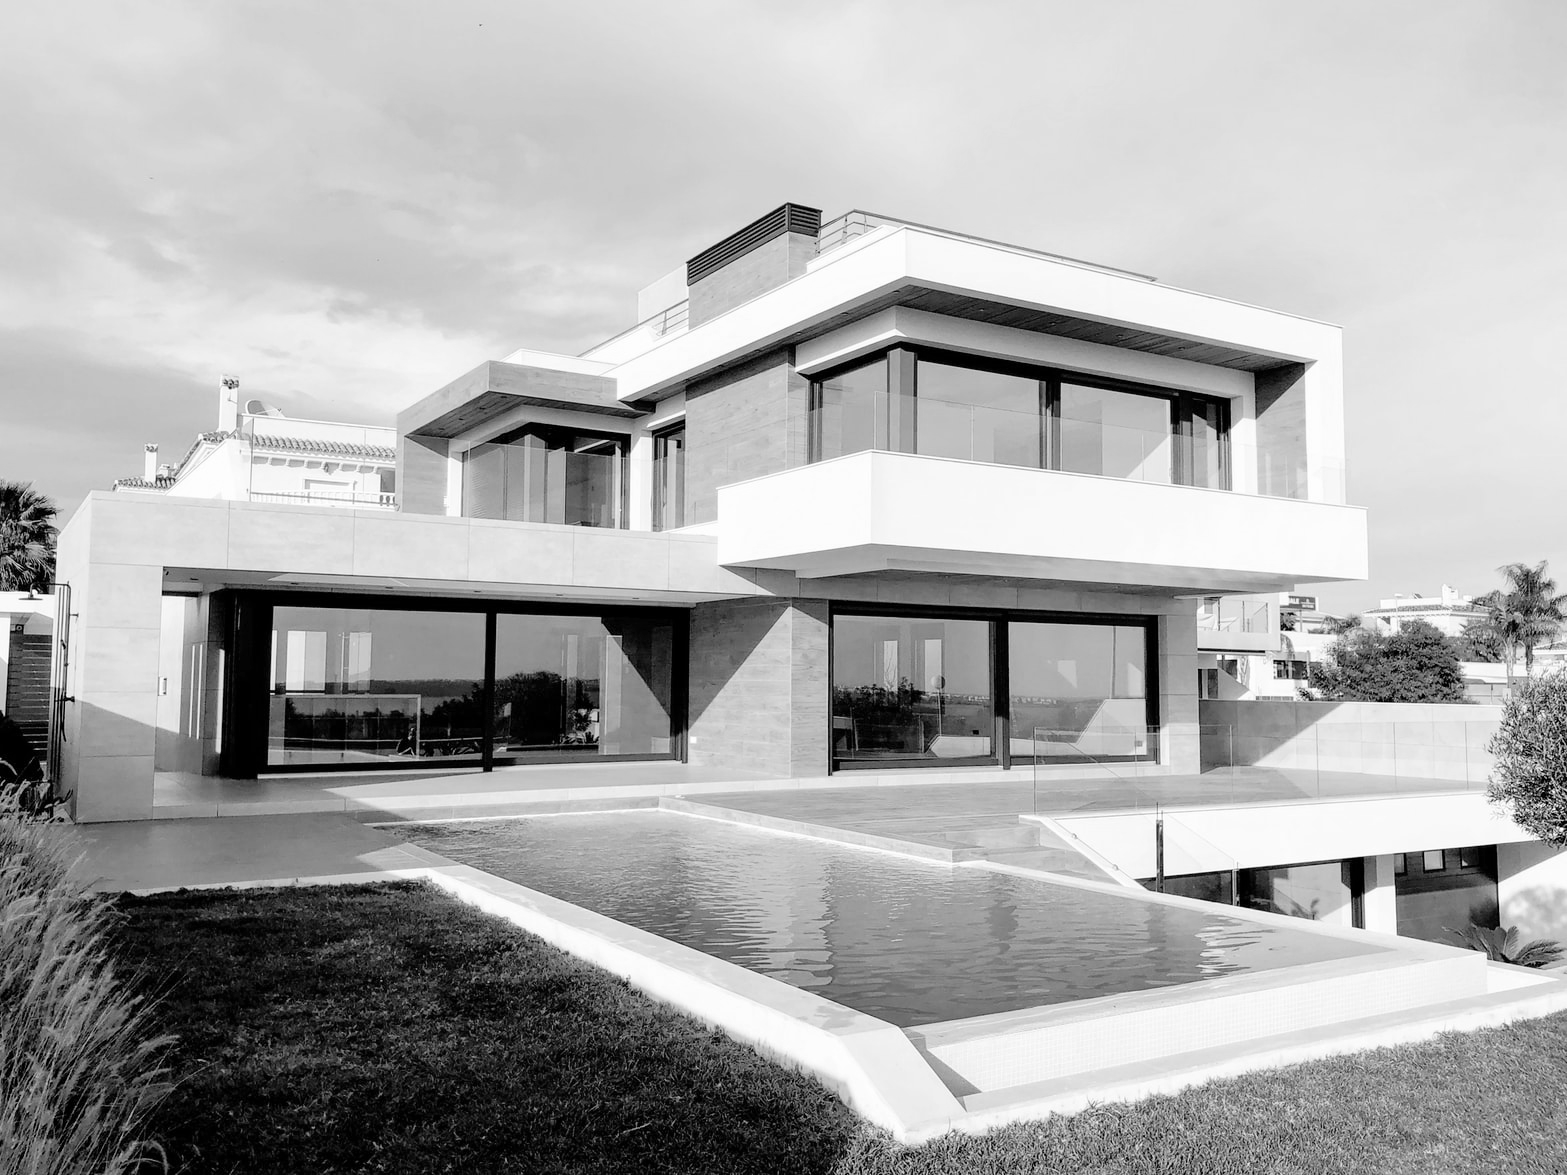

In [17]:
# Here (r1,s1) = (65,90) and (r2,s2) = (165,190)
r1 = 65
s1 = 90
r2 = 165
s2 = 190

for i in range(len(img)):
    for j in range(len(img[i])):
        x = img[i][j]
        if(0 <= x and x <= r1):
            ct[i][j] = (s1/r1 * x)
        elif(r1 < x and x <= r2):
            ct[i][j] = ((s2 - s1)/(r2 - r1)) * (x - r1) + s1
        elif(r2 < x and x <= 255):
            ct[i][j] =((255 - s2)/(255 - r2)) * (x - r2) + s2
cv2_imshow(ct)

# Bit Plane Slicing


8th to 5th Bit


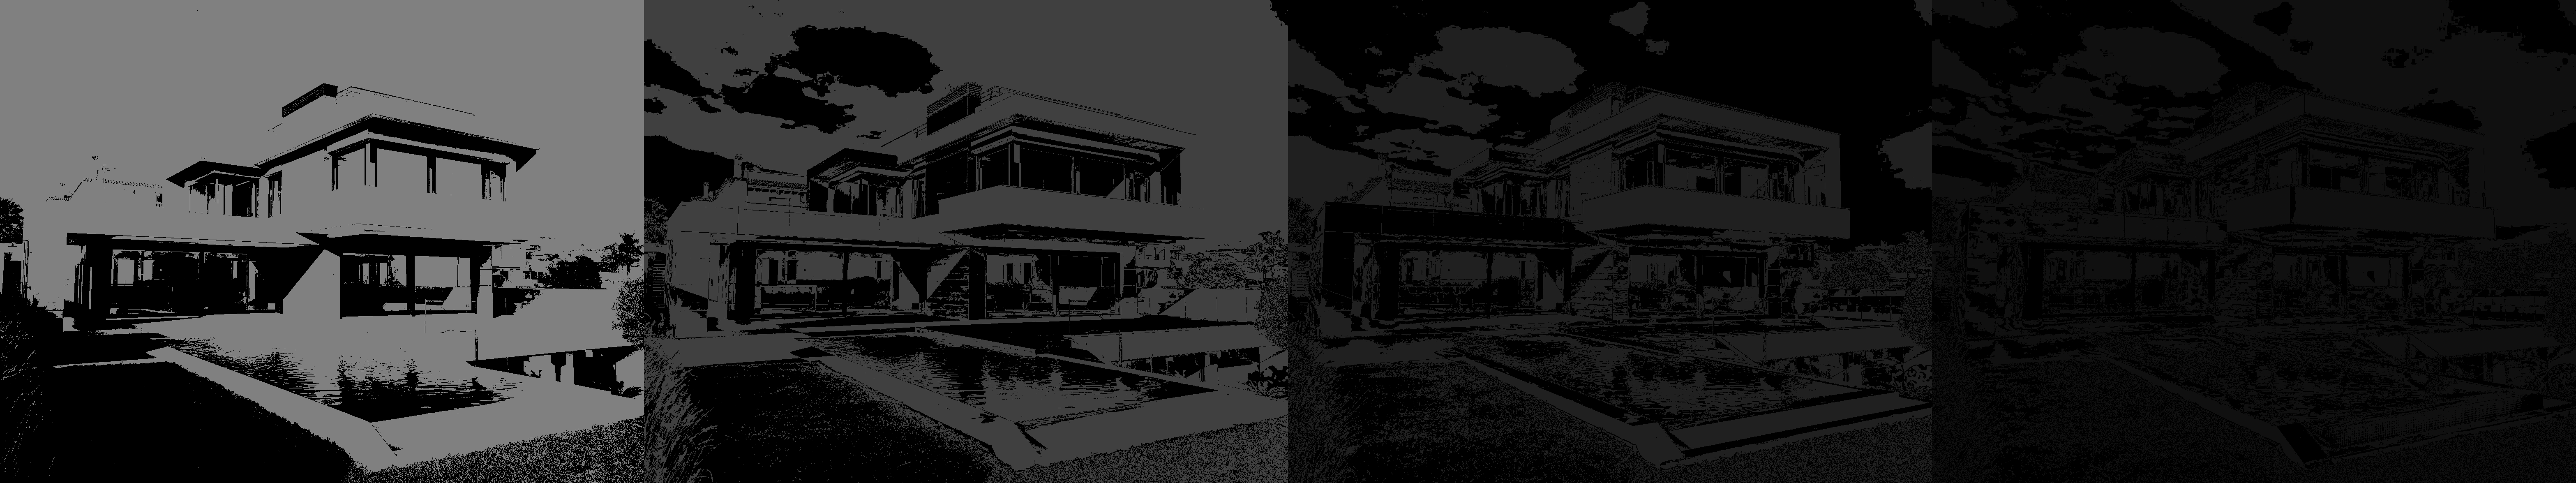

4th to 1st Bit


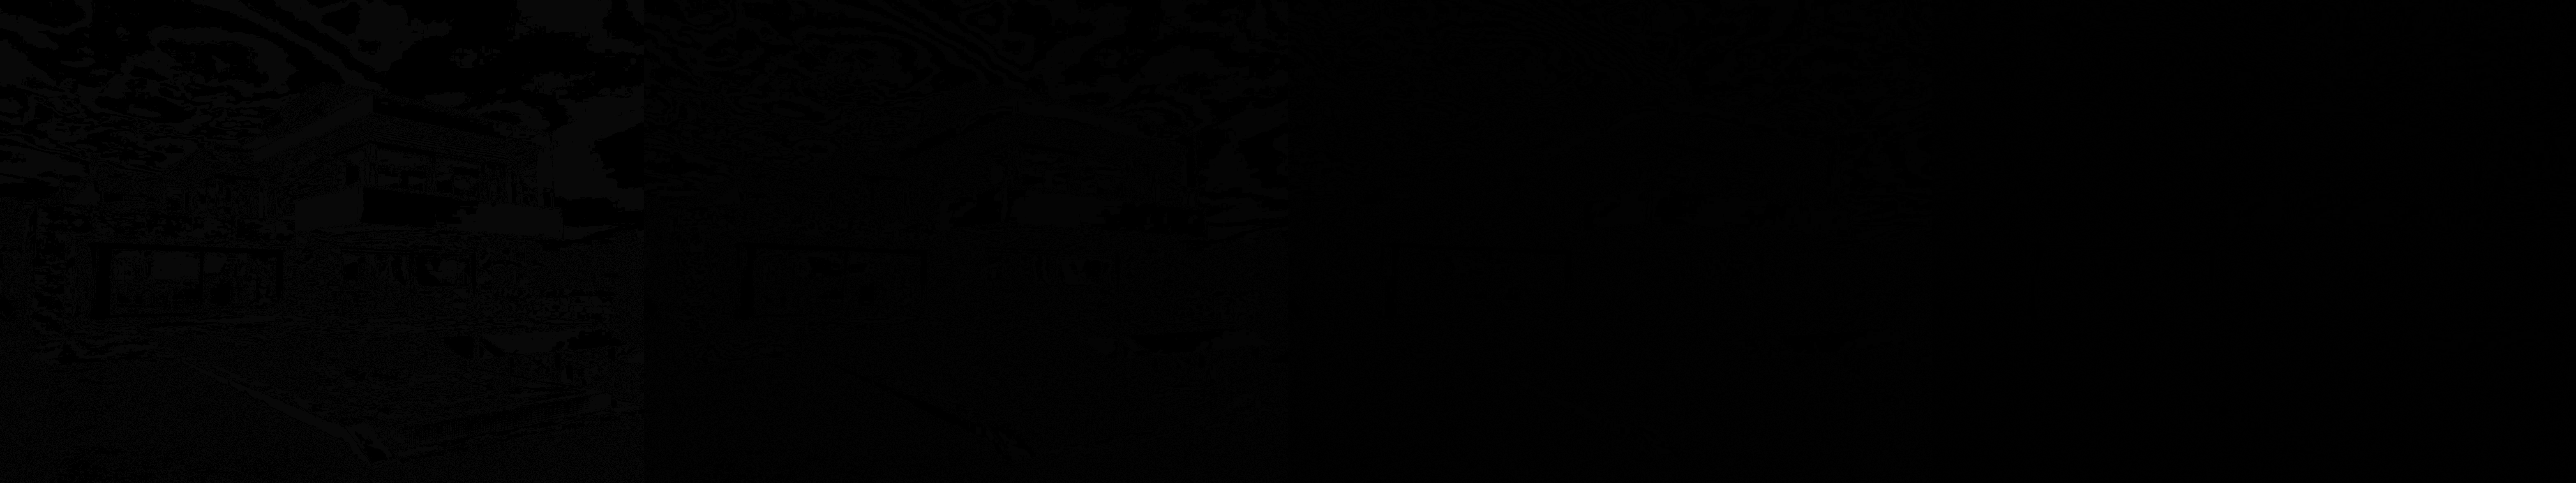

In [18]:
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
# Concatenate these images for ease of display using cv2.hconcat()
finalr = cv.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
print("8th to 5th Bit")
cv2_imshow(finalr)


finalv =cv.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
print("4th to 1st Bit")
cv2_imshow(finalv)

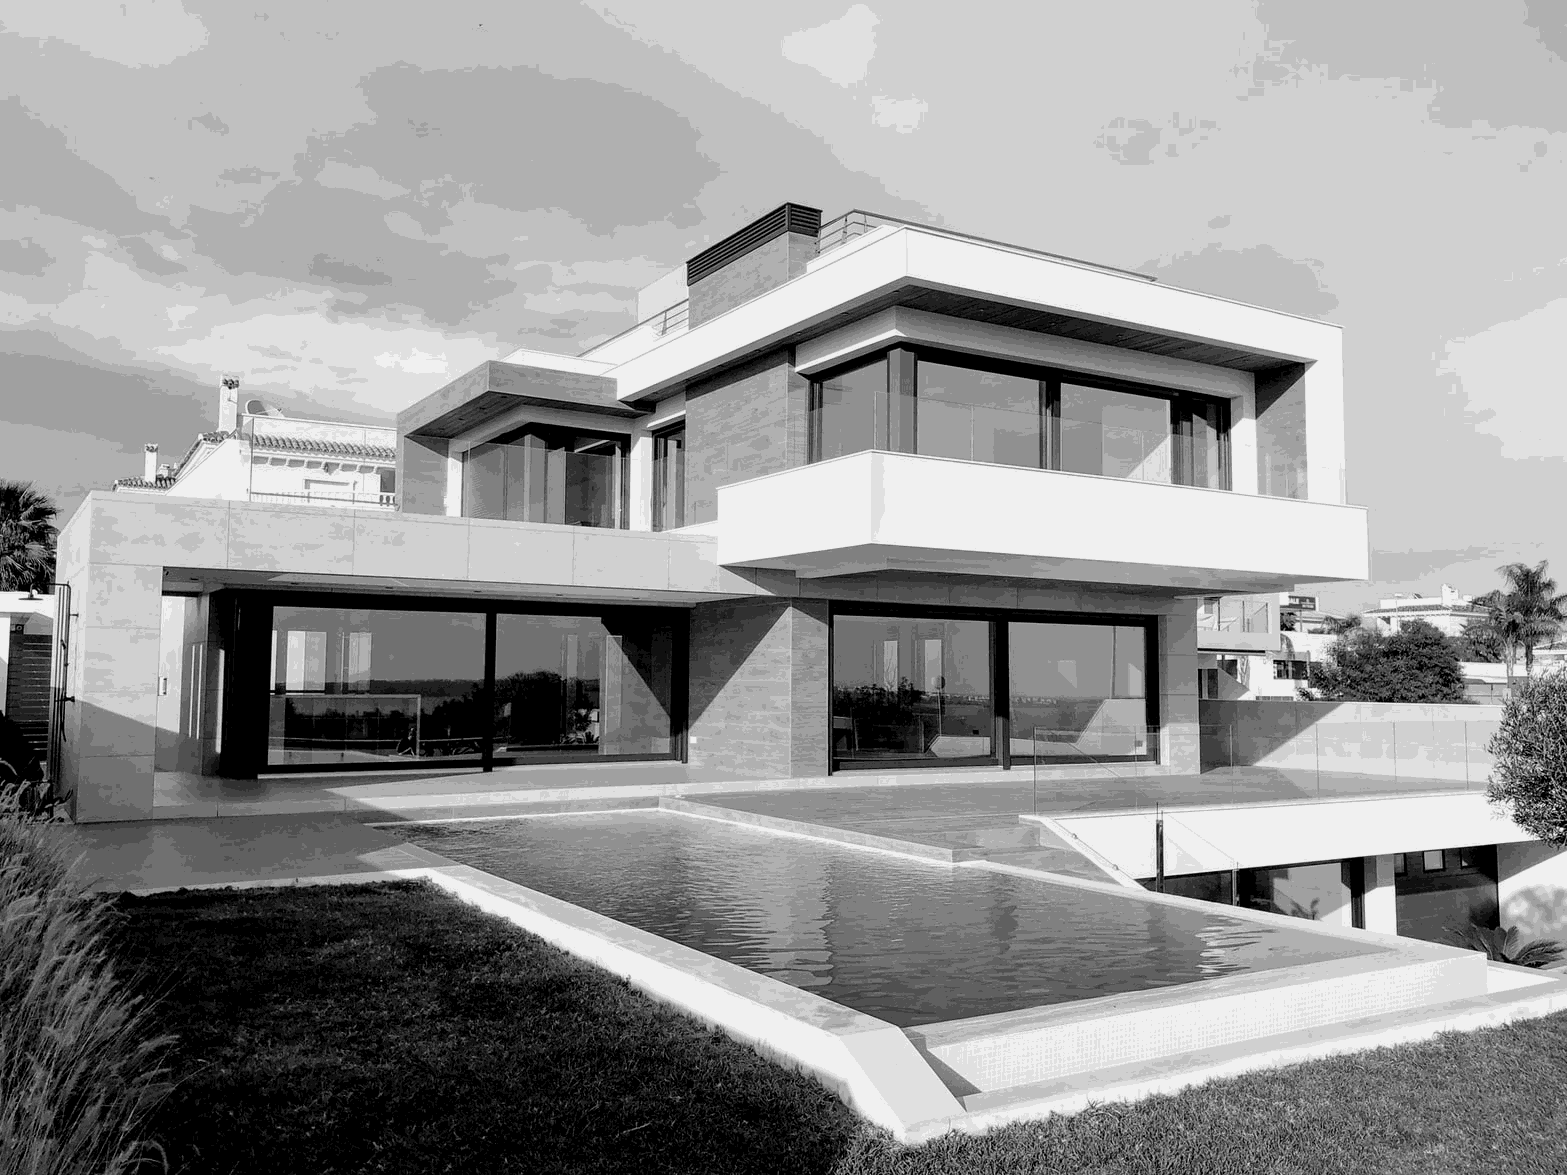

In [19]:
# Combining 4 bit planes
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
# Display the image
cv2_imshow(new_img)

# **Programming Ex 03**

3. Do bit plane slicing of a random image and combine bitplane 8,7
and 6

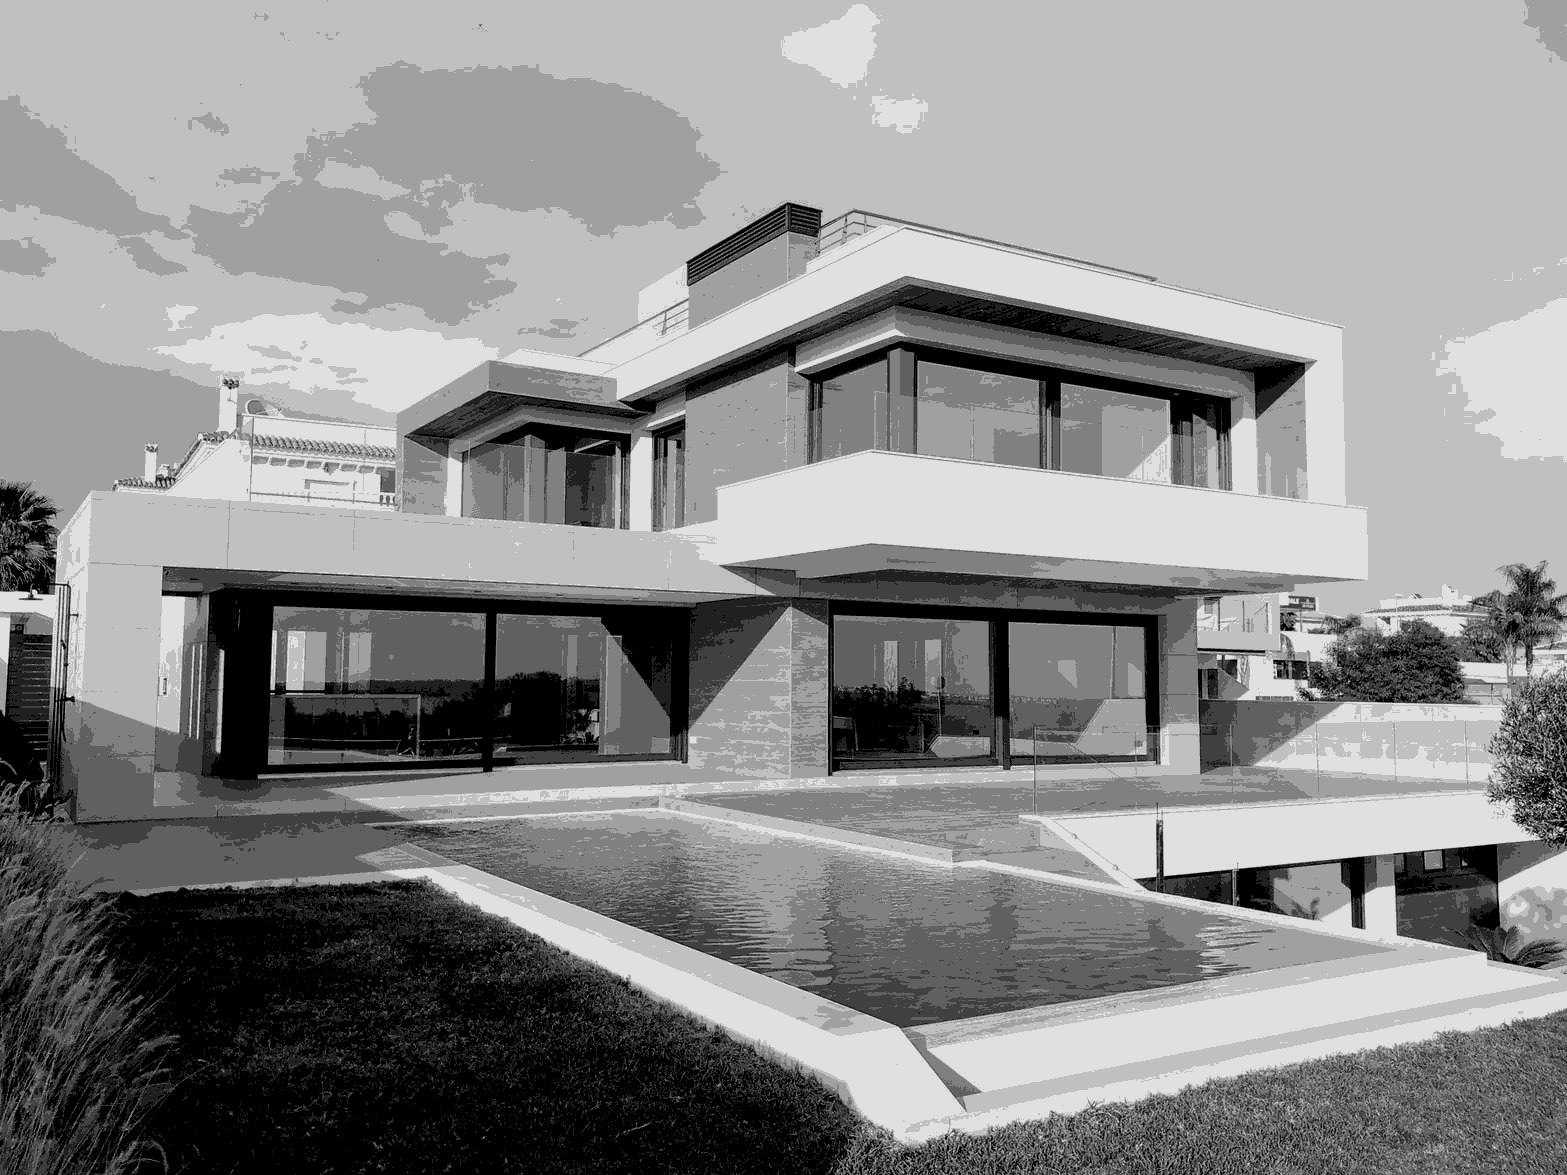

In [20]:
# Combining 8,7,6 bit planes
new_img = eight_bit_img+seven_bit_img+six_bit_img
# Display the image
cv2_imshow(new_img)

# Log Transformation

# **Programming Ex 04**


4. Do log transformation of a random image with c as your roll
number.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


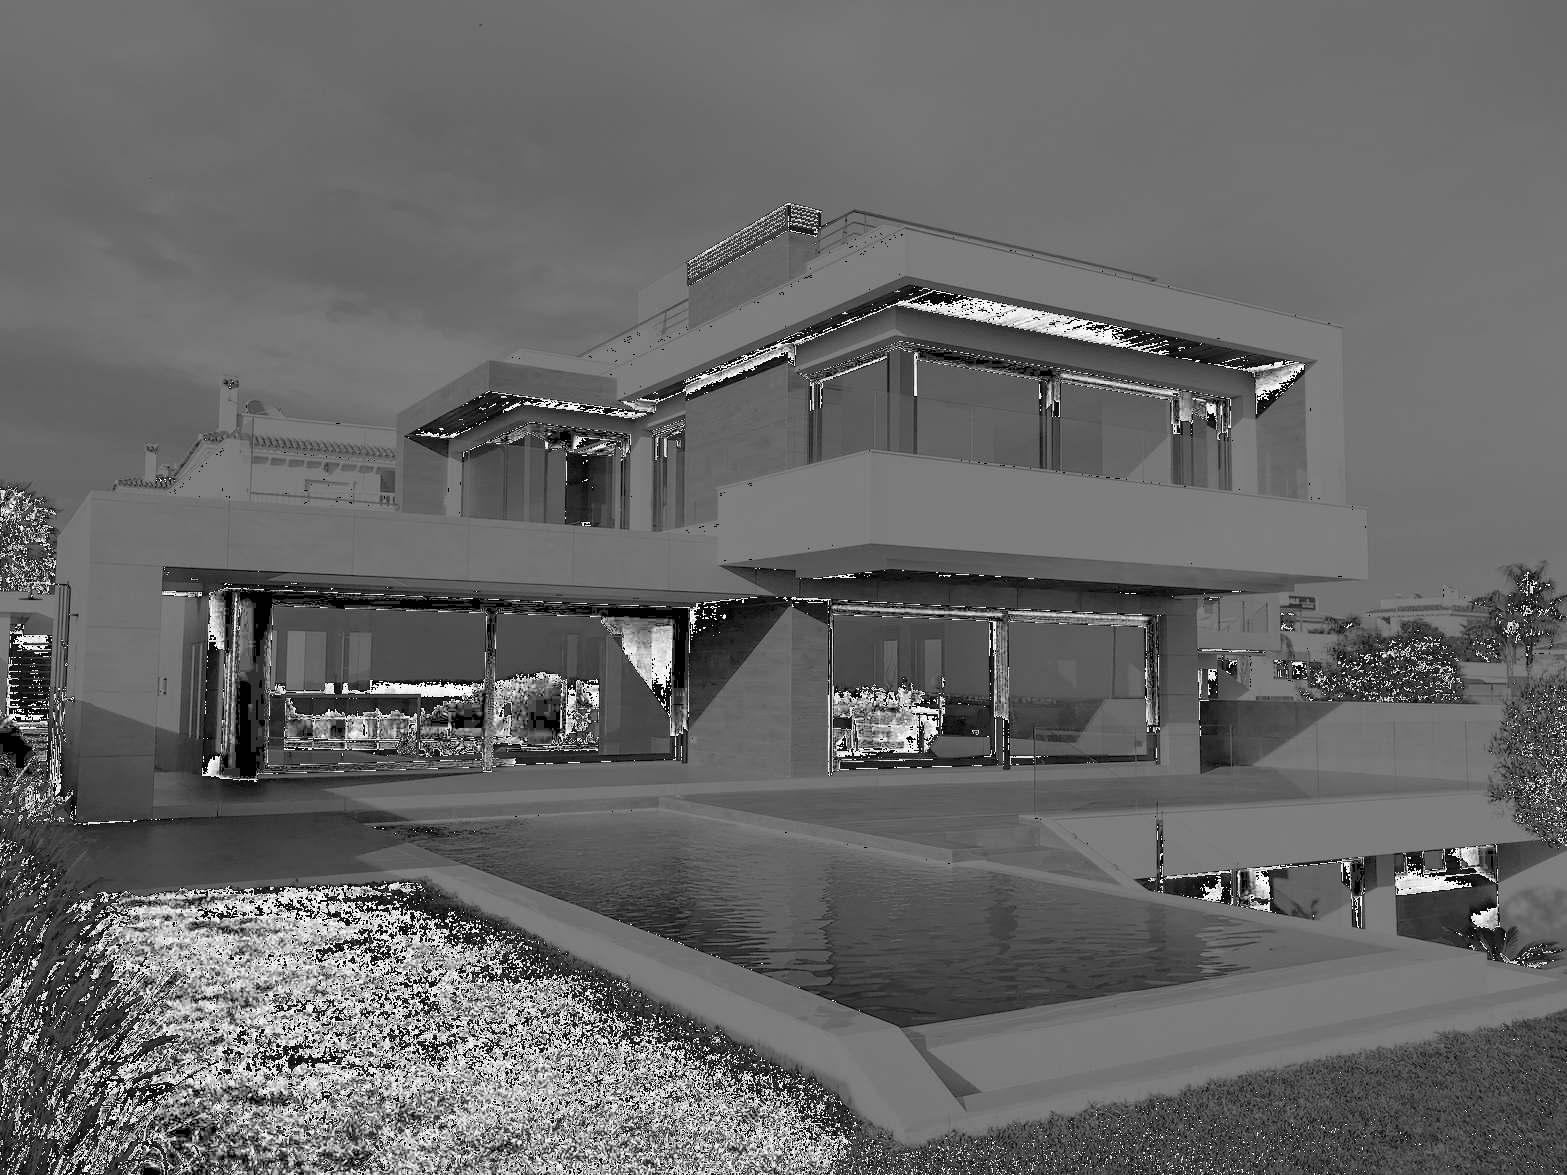

In [21]:
# c = 255/ np.log(1 + np.max(img)) 
c = 69
log_image = c * (np.log(img + 1)) 
   
# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 
# Display the image
cv2_imshow(log_image)